# Работа с заданием Spotify

## Основаня цель работы - это решение задачи регрессии по предсказанию популярности песни

## Импортируем необходимые библиотеки
* Pandas - используется для обработки и анализа данных
* Numpy - используется для выполнения линейных алгебраических вычеслений
* Matplotlib.pyplot - используется для отрисовки графиков
* Seaborn - также используется для отрисовки графиков

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

/kaggle/input/spotifydataset/dataset.csv


## Читаем файл

In [14]:
df = pd.read_csv('/kaggle/input/spotifydataset/dataset.csv')
df.head(15)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


# EDA

## Расшифровка колонок

* **Unnamed** - колонка номера песни, счетчик
* **track_id** - идентификатор песни. Является случайным набором цифр и латинских букв.
* **artists** - имена или псевдонимы артистов, работавщих над песней. Если их несколько, то они указываются через **;**. Является текстом.
* **album_name** - название альбома, из которого была взята песня. Является текстом.
* **track_name** - название песни, является текстом.
* **popularity** - индекс популярности песни, может принимать значения от 0 до 100 включительно. **Именно это значение нужно будет предсказать.**
* **duration_ms** - длина песни в милисекундах, является целым числом.
* **explicit** - булевское значение, показывающее присутствуют ли в песне нецензурная лексика. **True** - присутствует, **False** - отсутствует.
* **danceability** - показатель того насколько песня подходит для танцев. Принимает значения в виде дробного числа от 0 до 1.
* **energy** - показатель энергичности песни. Принимает значения в виде дробного числа от 0 до 1.
* **key** - тональность песни. Является целым числом от 0 до 11.
* **loudness** - показатель громкости песни. Является дробным числом.
* **mode** - режим аудиозаписи. Принимает значения либо 0, либо 1.
* **speechiness** - показатель красноречивости текста в песне. Принимает значения в виде дробного числа от 0 до 1.
* **acousticness** - показатель звучания песни, оценивает качество звука. Принимает значения в виде дробного числа от 0 до 1.
* **instrumentalness** - показатель звучания инструментов в песне. Принимает значение в виде дробного числа от 0 до 1.
* **liveness** - показатель живости песни. Принимает значения в виде дробного числа от 0 до 1.
* **valence** - валентность песни, означает привлекательность звуков для человеческого слуха. Принимает значения в виде дробного числа от 0 до 1.
* **tempo** - темп песни, указывается в виде BPM (удары в минуту). Принимает значения в виде дробного числа.
* **time_signature** - размер такта, указывает сколько ударов приходится на каждый такт песни. Указывается в виде целого числа от 0 до 4.
* **track_genre** - жарн песни, является текстом.

## Просмотр данных

In [15]:
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


В датасете большое кол-во данных, а именно 114000 песен.

## Избавление от пропусков

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Видим что есть 3 нулевых значиния, а именно в колонках artists, album_name, track_name. Есть предположение, что они все находятся в одной строке. Проверим это

In [17]:
df[df.isnull().any(axis=1)]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


Действительно, это так. Поэтому просто удалим ее

In [18]:
df = df.dropna()

In [19]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Как видим пропусков нет.

# Анализируем dataset

## Изменение колонок

In [20]:
df['explicit'] = df['explicit'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  int64  
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          113999 

/tmp/ipykernel_24/3027638561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['explicit'] = df['explicit'].astype('int64')


Заметим что в колонке duration_ms длина песни находится в миллисекундах. Для удобства переведем время в минуты. Чтобы это сделать, округлим результат деления значения из duration_ms на 60000, и также переименнуем duration_ms в duration_min.

In [21]:
def change_to_min(x):
    return round(x / 60000, 1)

#меняем значения в колонке с миллисекунд на минуты
df['duration_ms'] = df['duration_ms'].apply(change_to_min)

#меняем название колонки
df = df.rename(columns={'duration_ms' : 'duration_min'})

/tmp/ipykernel_24/2651048276.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_ms'] = df['duration_ms'].apply(change_to_min)


In [22]:
df['duration_min']

0         3.8
1         2.5
2         3.5
3         3.4
4         3.3
         ... 
113995    6.4
113996    6.4
113997    4.5
113998    4.7
113999    4.0
Name: duration_min, Length: 113999, dtype: float64

Зададим палитру для графиков

In [23]:
sns.set(style='whitegrid')
colors = ['#ff6600', '#002eff']
palette = {0: colors[0], 1: colors[1]}

## Матрица корреляции

Для анализа стоит расмотреть матрицу корреляции. Представим ее в виде тепловой карты.

Параметры для heatmap:
* **data** - данные на которых строится тепловая карта.
* **fmt** - формат надписей в ячейках. **.2f** означает что оставляем 2 знака после запятой.
* **annot** - добавляет значения в ячейки при **True**.
* **cmap** - устанавливает цветовую схему.
* **ax** - устанавливает оси.

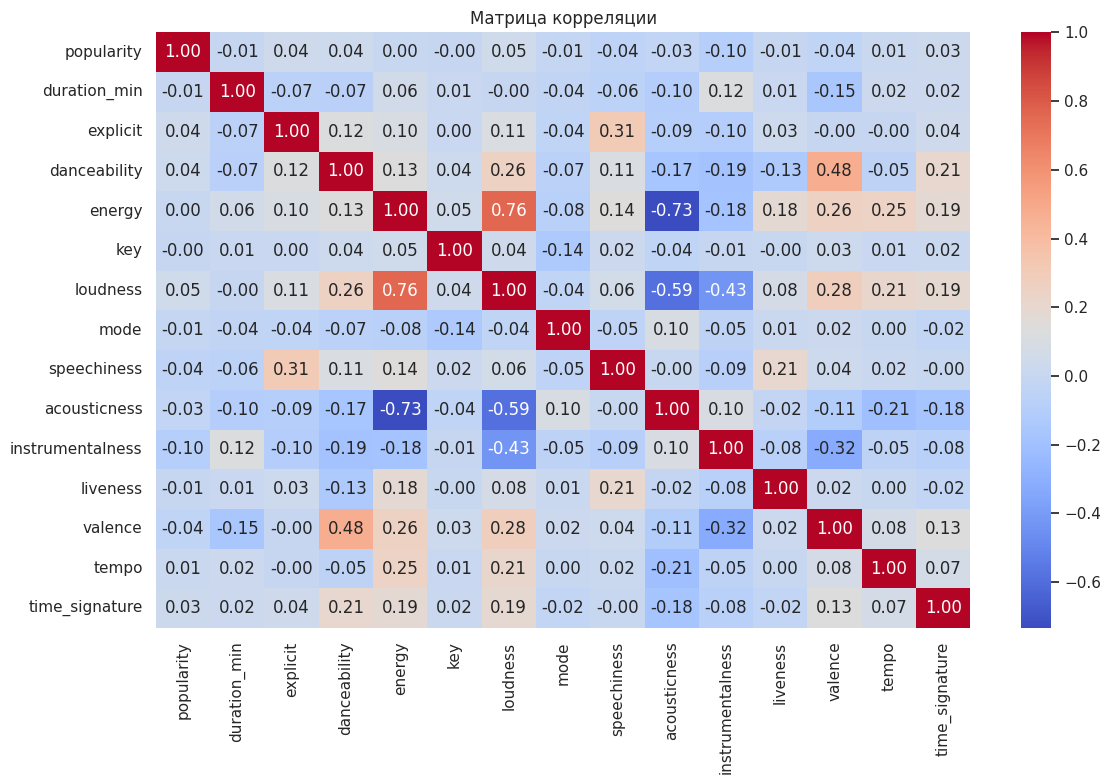

In [24]:
corr_data = df.loc[:, ['popularity', "duration_min", 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 
                         'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]

#посторение тепловой карты корреляции
corr_data_1 = corr_data.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(data=corr_data_1, fmt='.2f', annot=True, cmap='coolwarm', ax=ax)

plt.title('Матрица корреляции')
plt.tight_layout()
plt.show()

**Результаты анализа матрицы корреляции:**

1. **speechiness** и **explicit**
* Эта корреляция показывает что наличие в песне нецензурной лексики связана с красноречивостью песни. То есть чем больше матов, тем красноречивее текст песни.
2. **loudness** и **energy**
* Эта корреляция показывает что громкость музыки и энергичность очень хорошо связаны. Чем громче музыка, тем она энергичнее.
3. **acousticness** и **energy**
* Данная корреляция показывает что музыка c качественным звуком не энергичная.
4. **valence** и **danceability**
* Корреляция говорит что чем приятнее музыка, тем сильнее под нее хочется танцевать.
5. **acousticness** и **loudness**
* Это корреляция говорит, что чем тише музыка, тем в ней более качественее звук.
6. **instrumentalness** и **loudness**
* Корреляция показывает что, чем болешь в ней муз. инструментов и они более качественные, тем она тише.
7. **valence** и **instrumentalness**
* Данная корреляция говорит о том, что чем приятнее слушать песню, тем в ней качественее инструменты.

Также рассмотри корреляцию с таргетной переменной **popularity**

In [25]:
corr_popularity = corr_data_1['popularity'][1:]
corr_popularity

duration_min       -0.007167
explicit            0.044078
danceability        0.035444
energy              0.001053
key                -0.003847
loudness            0.050420
mode               -0.013948
speechiness        -0.044930
acousticness       -0.025458
instrumentalness   -0.095147
liveness           -0.005397
valence            -0.040522
tempo               0.013212
time_signature      0.031076
Name: popularity, dtype: float64

Видим что корреляция не очень сильная. Значит популярность песни почти не зависит от представленных признаков.

Тогда отчего же зависит популярность песни? Есть несколько вариантов:
* От закодированных признаков (**artists**, **album_name**, **track_name**, **track_genre**).
* От внешних признаков (реклама, продвижение).

Проверим это.

# Гипотезы

## 1. Чем песня короче, тем она популярна?

Посмотрим как меняется популярность песни от ее длины

Создаем график, где по оси X будет длина песни в минутах, а по оси Y будет популярность песни. Каждая песня обозначена точкой.

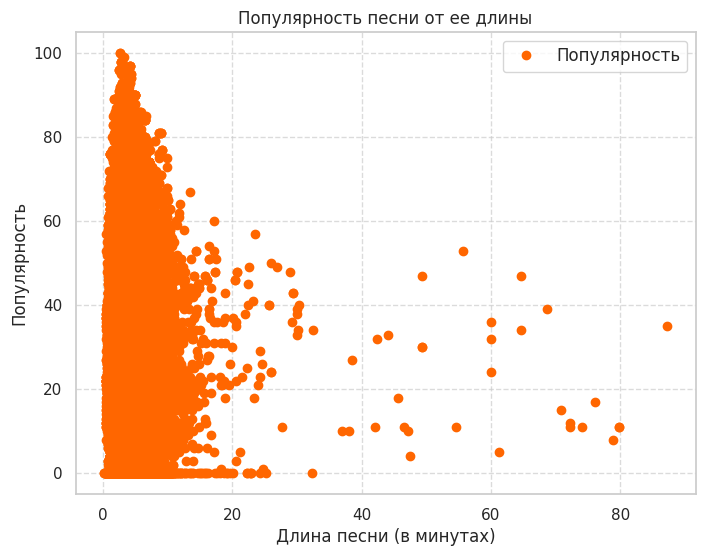

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('whitegrid')

#создаем график
ax.plot(df['duration_min'], df['popularity'], marker='o', linestyle='', color='#ff6600', linewidth=2, label='Популярность')

#установка сетки
ax.grid(True, linestyle='--', alpha=0.7)

ax.set_xlabel('Длина песни (в минутах)')
ax.set_ylabel('Популярность')
ax.set_title('Популярность песни от ее длины')

ax.legend(fontsize=12)
plt.show()

Из графика видно, что песни длинной больше 10 мин не так популярны, как песни которые меньше 10 мин.

### Вывод по графику
Песни длиной меньше 10 минут более популярны.

### Вывод по гипотизе

## Вывод по гипотизам

# Feature Engineering

# Кросс-валидация

# Заключение и вывод